# Titanic ML competition - EDA

## TODO
* Melhorar análise exploratória de dados - Mais variáveis e mais indicativos estatísticos
* Processar, tratar e limpar dados
* Revisar e estudar mais os testes de hipóteses
* Adicionar novos modelos de Machine Learning, feature and params engineer e testar modelos
* Separar em arquivos específicos

## Imports

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency, ttest_ind
import warnings

In [2]:
warnings.filterwarnings('ignore')

## EDA

In [37]:
train_data = pd.read_csv('../datasets/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
num_data = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_data = ['Sex', 'Embarked']

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,712.000000,889.000000,889.000000,889.000000
mean,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train_data[cat_data].value_counts()

Sex     Embarked
male    S           441
female  S           203
male    C            95
female  C            73
male    Q            41
female  Q            36
Name: count, dtype: int64

In [6]:
train_data['SurvivedStr'] = train_data['Survived'].replace({0: "No", 1: "Yes"})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


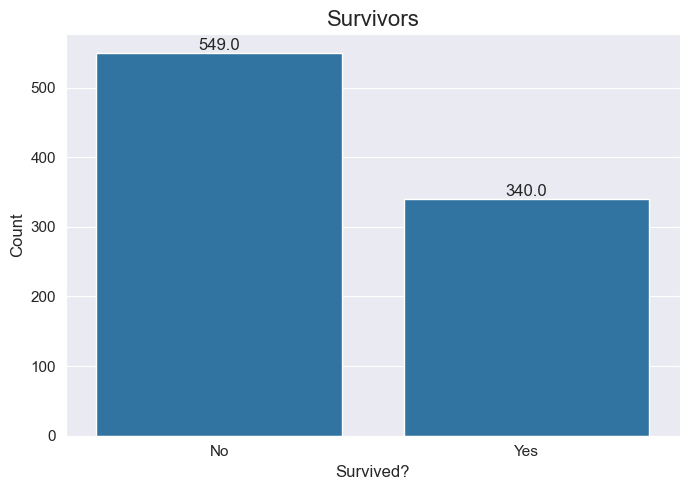

In [7]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Survived?', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Count', fontsize=12)
for p in graph.patches: #bars
    graph.annotate( #add text
        f'{p.get_height()}', #bar height = value
        (p.get_x() + p.get_width() / 2., p.get_height()), #value position
        ha='center', va='bottom', #align
        fontsize=12
    )
plt.tight_layout()
plt.show()

In [8]:
survived = train_data.query('Survived==1')
not_survived = train_data.query('Survived==0')

In [9]:
survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,340.000000,288.000000,340.000000,340.000000,340.000000
mean,1.955882,28.193299,0.476471,0.467647,48.209498
std,0.862763,14.859146,0.709838,0.773156,66.748773
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.443750
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,56.946900
max,3.000000,80.000000,4.000000,5.000000,512.329200


In [10]:
not_survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


In [52]:
survived[cat_data].value_counts()

Sex     Embarked
female  S           140
male    S            77
female  C            64
male    C            29
female  Q            27
male    Q             3
Name: count, dtype: int64

In [55]:
not_survived[cat_data].value_counts()

Sex     Embarked
male    S           364
        C            66
female  S            63
male    Q            38
female  C             9
        Q             9
Name: count, dtype: int64

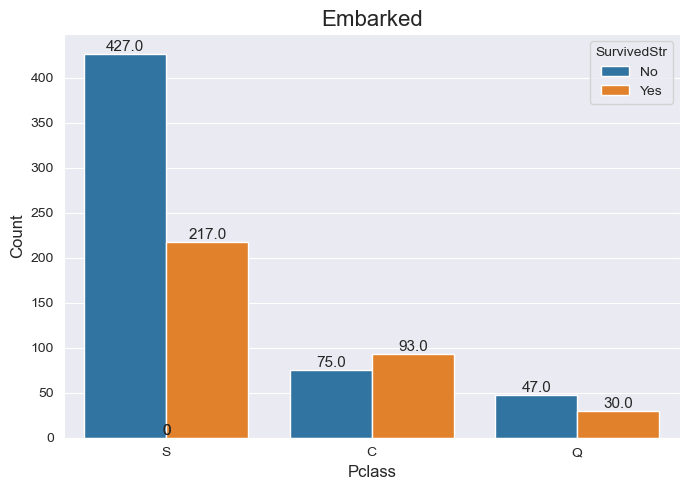

In [11]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Embarked', hue='SurvivedStr')
plt.title('Embarked', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

The proportion of survivors in C or Q appears to be higher than in S

## Insight 1

The mean, maximum value and median of Pclass and Fare in the survivor table are higher than in the non-survivor table. <br>
This shows us that the social class of passengers can have a great influence on their survival. <br>
The remaing variables do not show considerable variations between the two tables.

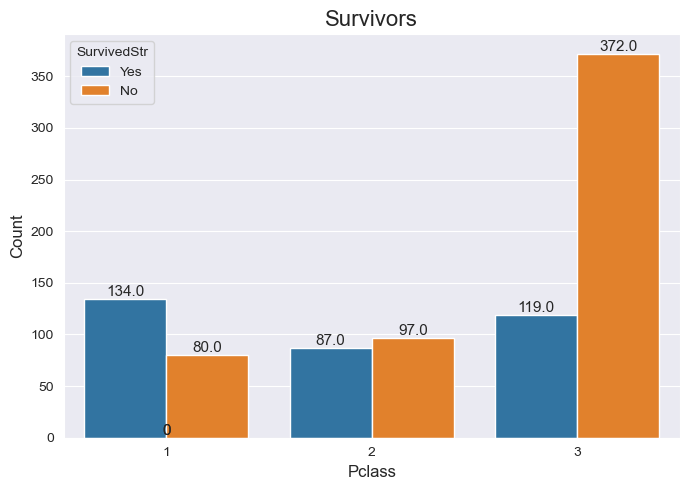

In [12]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Pclass', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

In [13]:
train_data['FareLog2'] = np.log2(train_data['Fare'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr,FareLog2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,2.857981
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,6.155492
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,2.986411
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,5.730640
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,3.008989


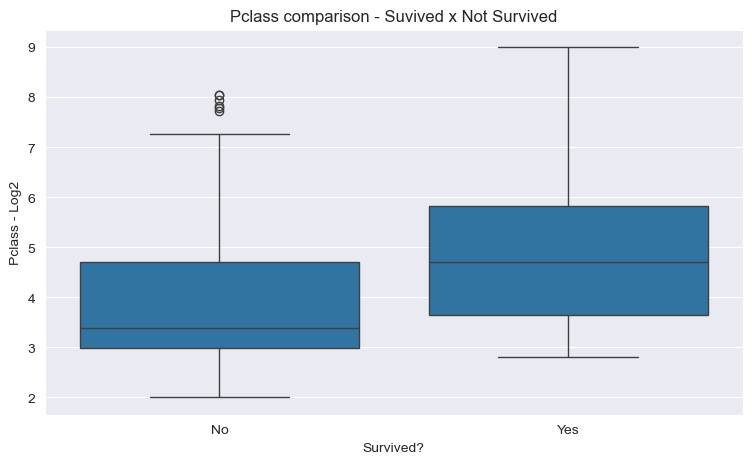

In [14]:
plt.figure(figsize=(9,5))
sns.boxplot(x='SurvivedStr', y='FareLog2', data=train_data)
plt.title('Pclass comparison - Suvived x Not Survived')
plt.xlabel('Survived?')
plt.ylabel('Pclass - Log2')
plt.show()

In [15]:
survived['Sex'].value_counts()

Sex
female    231
male      109
Name: count, dtype: int64

In [16]:
not_survived['Sex'].value_counts()

Sex
male      468
female     81
Name: count, dtype: int64

## Insight 2
More women survived than men, which may indicate that gender has some influence on survival or not.

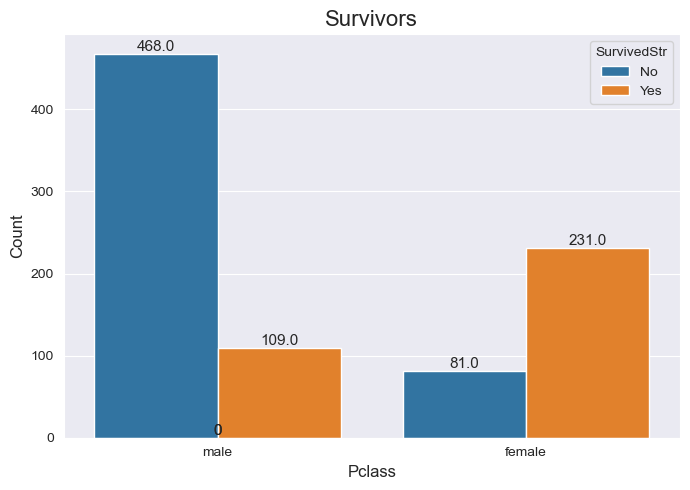

In [17]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Sex', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

## Insight 3

People with more SibSP and more Parch seem to survive less.

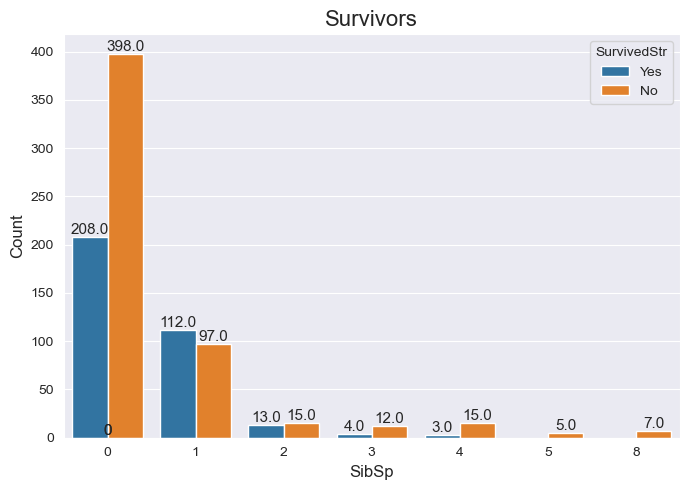

In [18]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='SibSp', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('SibSp', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

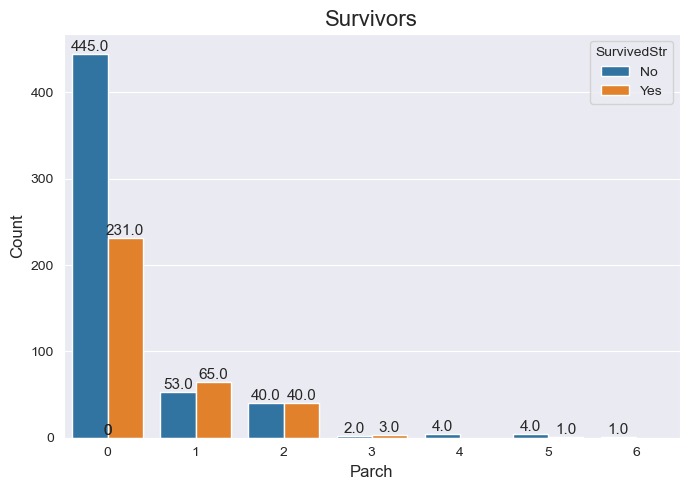

In [19]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Parch', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Parch', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

## Hypotesis testing

### Woman survived more
H0 -> The proportion of female survivors is the same as of men.<br>
H1 -> The proportion of female survivors is greater than that of men.

In [20]:
contingency_table_sex = pd.crosstab(train_data['Sex'], train_data['Survived'])

In [21]:
chi2, p, dof, expected = chi2_contingency(contingency_table_sex)
print(f'Chi2: {round(chi2,2)}\np-value: {round(p,2)}')

Chi2: 258.43
p-value: 0.0


**Rejected H0**

### Passengers with higher Fare survived more

H0 -> The average Fare for survivors is the same as that non-survivors<br>
H1 -> The average Fare for survivors is higher than that for non-survivors

In [22]:
survived_fare = survived['Fare']
not_survived_fare = not_survived['Fare']

In [23]:
t_stat, p_value = ttest_ind(
    survived_fare, not_survived_fare, nan_policy='omit'
)
print(f't-value: {round(t_stat,2)}\np-value: {round(p_value,2)}')

t-value: 7.86
p-value: 0.0


**Rejected H0**

### Passengers in Pclass 1 survived more

HO -> It is the same<br>
H1 -> Higher

In [24]:
contingency_table_pclass = pd.crosstab(
    train_data['Pclass'], train_data['Survived']
)

In [25]:
chi2_pclass, p_value, dof_pclass, expected_pclass = chi2_contingency(
    contingency_table_pclass
)
print(f'chi-2: {round(chi2_pclass,2)}\np-value: {round(p_value,2)}')

chi-2: 100.98
p-value: 0.0


### Passengers with more SibSp and more Parch survived less

H0 -> It is the same<br>
H1 -> Less

In [26]:
contingency_table_sibsp = pd.crosstab(
    train_data['SibSp'], train_data['Survived']
)

In [27]:
contingency_table_parch = pd.crosstab(
    train_data['Parch'], train_data['Survived']
)

In [28]:
chi2_sibsp, p_value, _, _ = chi2_contingency(
    contingency_table_sibsp
)
print('SibSp')
print(f'chi-2: {round(chi2_sibsp,2)}\np-value: {round(p_value,2)}')
chi2_parch, p_value, _, _ = chi2_contingency(
    contingency_table_parch
)
print('Parch')
print(f'chi-2: {round(chi2_parch,2)}\np-value: {round(p_value,2)}')

SibSp
chi-2: 37.74
p-value: 0.0
Parch
chi-2: 28.4
p-value: 0.0


**Rejected H0** - both

### Embarked C survived more than S and Q - Q > S

H0 -> It is the same<br>
H1 -> Higher

In [29]:
contingency_table_embarked = pd.crosstab(
    train_data['Embarked'], train_data['Survived']
)

In [30]:
chi2_embarked, p_value, _, _ = chi2_contingency(
    contingency_table_embarked
)
print(f'chi-2: {round(chi2_embarked,2)}\np-value: {round(p_value,2)}')

chi-2: 26.49
p-value: 0.0


**Rejected H0**

## Machine Learning Model - Random Forest

In [31]:
test_data = pd.read_csv('../datasets/test.csv')

In [32]:
y = train_data['Survived']
features = ['Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [33]:
best_params = {
    'max_depth': 20, 
    'n_estimators': 500
}
model = RandomForestClassifier(
    **best_params, random_state=1
)
model.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=1)

In [34]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [35]:
output = pd.DataFrame(
    {
        'PassengerId': test_data.PassengerId,
        'Survived': predictions
    }
)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [36]:
output.to_csv('submission.csv', index=False)

**Score: 0.77033**